<h1>
<center>
Dataquest Guided Project 14:
Predicting Car Prices
</center>
</h1>

## Introduction

This is part of the Dataquest program.

- part of paths **Data Scientist in Python**
    - Step 6: **Machine Learning**
        - Course 1 :  **Machine Learning Fundamentals **
            - K-nearest neighbors
            - Evaluating model performance
            - Multivariate K-nearest neighbors
            - Hyperparameter optimization
            - Cross validation
            
As this is a guided project, we are following and deepening the steps suggested by Dataquest. In this project, we will practice the machine learning workflow to predict a car's market price using its attribute.

## Use case : Predicting Car Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 
We downloaded the data set from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).

## Load the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_palette('husl')
sns.set_style('white')

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## Data cleaning

We notice that the column names don't match the one in the [dataset's documentation](https://archive.ics.uci.edu/ml/datasets/automobile). Let's fix this.

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars.columns = cols
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Let's determine which columns are numeric and can be used as features and which one is the target column.

In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
attributes = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
target = ['price']

In [5]:
numeric_cars = cars[continuous_values_cols]
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can see that 4 rows are missing data for the "price" column. As it is our target, we'll drop the values. 

In [6]:
numeric_cars = numeric_cars.dropna(subset=target)
numeric_cars.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Let's replace the missing values using the average value from that column: 

In [7]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Let's now rescale the value in the numeric column so they all range from 0 to 1. 

In [8]:
rescale_denom = numeric_cars[attributes].max() - numeric_cars[attributes].min()
numeric_cars[attributes] = (numeric_cars[attributes] - numeric_cars[attributes].min()) / rescale_denom

## Build a K-nearest neighbors model to predict the car prices 

### Univariate model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure our code workflow and understand the features better.

In [9]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

We will now train and test univariate models using the different numeric columns in the dataset to determine which column performed the best using the default k value.

In [10]:
rmse_feature = dict()

for col in attributes:
    rmse = knn_train_test(col, target, numeric_cars)
    rmse_feature[col] = rmse
    
results_1 = pd.Series(rmse_feature)
results_1.sort_values()

curb-weight          3439.491639
highway-mpg          3737.162047
width                3773.135499
city-mpg             3813.193148
horsepower           4456.175620
length               5150.449177
wheel-base           5443.857347
bore                 6206.924562
peak-rpm             6458.378473
compression-rate     7193.588599
height               7380.628859
stroke               8184.186086
normalized-losses    8291.523386
dtype: float64

It looks like the 'curb-weight' column performed the best using the default k value. 
Let's now modify the knn_train_test function we wrote to accept a parameter for the k value (number of neighbors). The goal is to loop through a list of K values and features to determine which K value and features are most optimal in our machine learning model.

In [11]:
def knn_train_test_with_k(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model using the defined k value.
        knn.fit(train_df[[train_col]], train_df[target_col])
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])
        
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    
    return k_rmses

In [12]:
rmse_feature = dict()

for col in attributes:
    rmse = knn_train_test_with_k(col, target, numeric_cars)
    rmse_feature[col] = rmse
    
results_2 = pd.DataFrame(rmse_feature)

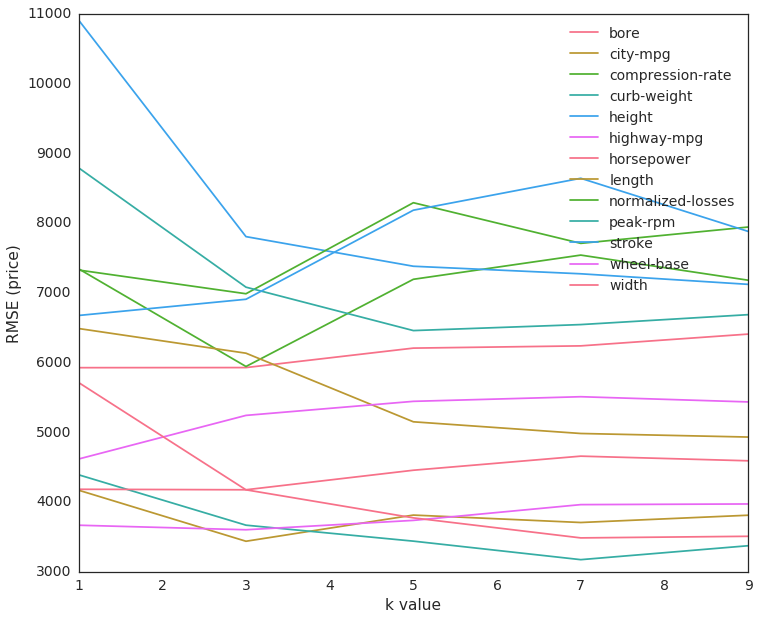

In [13]:
%matplotlib inline
ax = results_2.plot(figsize=(12, 10));
ax.set(xlabel='k value', ylabel='RMSE (price)');

The lowest RMSE value happens for the model built with k=7 and the feature "peak-rpm". Let's now build multivariate models.

### Multivariate model

Let's first use the default k value.

In [14]:
def knn_train_test_multivariate(train_cols, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_cols], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_cols])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

We want now to use the best 2, 3, 4 and 5 best features from the previous univariate model to train and test a multivariate k-nearest neighbors model using the default k value.

In [15]:
results_1.sort_values().index

Index(['curb-weight', 'highway-mpg', 'width', 'city-mpg', 'horsepower',
       'length', 'wheel-base', 'bore', 'peak-rpm', 'compression-rate',
       'height', 'stroke', 'normalized-losses'],
      dtype='object')

In [16]:
rmse_multivariate = dict()

sorted_features_list = results_1.sort_values().index
best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]

In [17]:
rmse_multivariate["best_two_rmse"]  = knn_train_test_multivariate(best_two_features, target, numeric_cars)
rmse_multivariate["best_three_rmse"] = knn_train_test_multivariate(best_three_features, target, numeric_cars)
rmse_multivariate["best_four_rmse"] = knn_train_test_multivariate(best_four_features, target, numeric_cars)
rmse_multivariate["best_five_rmse"] = knn_train_test_multivariate(best_five_features, target, numeric_cars)

In [18]:
rmse_multivariate

{'best_five_rmse': 2692.4443467600217,
 'best_four_rmse': 3048.2253868767643,
 'best_three_rmse': 3272.9984597002176,
 'best_two_rmse': 3359.5735360905555}

In this case, adding features decreases the RMSE (this is not true in general). The 5 features model is the most performant. 

#### Hyperparameter Tuning

Let's now optmize the model that performed the best in the previous step.

In [22]:
def knn_train_test_multivariate_k(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = range(1,25)
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model using default k value.
        knn.fit(train_df[train_cols], train_df[target_col])
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
        
    return k_rmses

In [23]:
rmse_multivariate["best_two_rmse"]  = knn_train_test_multivariate_k(best_two_features, target, numeric_cars)
rmse_multivariate["best_three_rmse"] = knn_train_test_multivariate_k(best_three_features, target, numeric_cars)
rmse_multivariate["best_four_rmse"] = knn_train_test_multivariate_k(best_four_features, target, numeric_cars)
rmse_multivariate["best_five_rmse"] = knn_train_test_multivariate_k(best_five_features, target, numeric_cars)

In [25]:
rmse_multivariate_df = pd.DataFrame(rmse_multivariate)

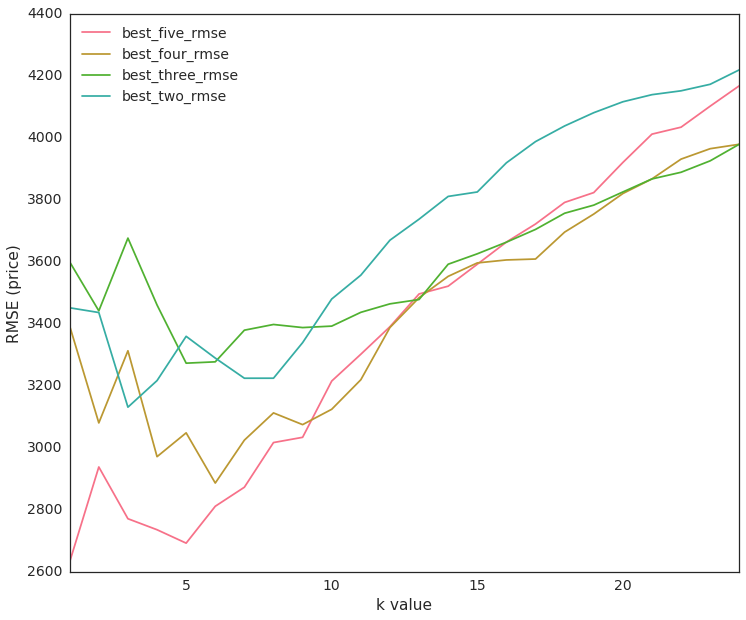

In [28]:
ax = rmse_multivariate_df.plot(figsize=(12,10));
ax.set(xlabel='k value', ylabel='RMSE (price)');

We can see that choosing more than 5 nearest neighbors doesn't improve our model significantly. 
If we had to build a model to predict car prices for a business purpose, for instance, we would choose the model with 5 features with 5 neighbors. 

In this project, we used a test/train validation method based on a 50/50 partition. We could test the models with other validation methods like k-fold validation. 